# Assignment 17 SVM (Suport Vector Machine)
## Dataset :- SalaryData_Train
### Quick info. about SVM 
#### Info. :-
An SVM is implemented in a slightly different way than other machine learning algorithms. It is capable of performing classification, regression and outlier detection.
Support Vector Machine is a discriminative classifier that is formally designed by a separative hyperplane. It is a representation of examples as points in space that are mapped so that the points of different categories are separated by a gap as wide as possible. In addition to this, an SVM can also perform non-linear classification. Let us take a look at how the Support Vector Machine work.
#### Advantages of SVM
Effective in high dimensional spaces.
Still effective in cases where the number of dimensions is greater than the number of samples.
Uses a subset of training points in the decision function that makes it memory efficient.
Different kernel functions can be specified for the decision function that also makes it versatile
#### Disadvantages of SVM
If the number of features is much larger than the number of samples, avoid over-fitting in choosing kernel functions and regularization term is crucial.
SVMs do not directly provide probability estimates, these are calculated using five-fold cross-validation.
#### Fore more info use link 
#### Ref.
https://www.edureka.co/blog/support-vector-machine-in-python/

In [1]:
# import req. libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

### Data loading 

In [2]:
SalaryData_Train01 = pd.read_csv("D:\Data Science Material\Assignments\SVM\SalaryData_Train.csv")

In [3]:
SalaryData_Train01.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploring the data

In [4]:
# Simple statistical measures

SalaryData_Train01.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# lets explore about the data types, null cols, dataset length, rows and columns

SalaryData_Train01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
SalaryData_Train01.shape

(30161, 14)

### Data Analysis

In [7]:
# checking null values

SalaryData_Train01.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
# Exploring columns more

SalaryData_Train01.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [9]:
SalaryData_Train01.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [10]:
# Exploring columns more

SalaryData_Train01.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [11]:
# Exploring columns more

SalaryData_Train01.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [12]:
# Exploring columns more

SalaryData_Train01.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [13]:
# Exploring columns more

SalaryData_Train01.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [14]:
# Exploring columns more

SalaryData_Train01.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [15]:
# Exploring columns more

SalaryData_Train01.race.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [16]:
# Exploring columns more

SalaryData_Train01.sex.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [17]:
# Exploring columns more

SalaryData_Train01.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

In [18]:
# making original data safe

SalaryData_Train = SalaryData_Train01.copy()

### Data cleaning 

#### Outier

In [19]:
SalaryData_Train.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [20]:
def count_plot(df,columns):
    plt.figure(figsize = (20,5))
    for i, var in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
    
features = SalaryData_Train.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'educationno',
 'maritalstatus',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Acer\anaconda3\lib\site-p

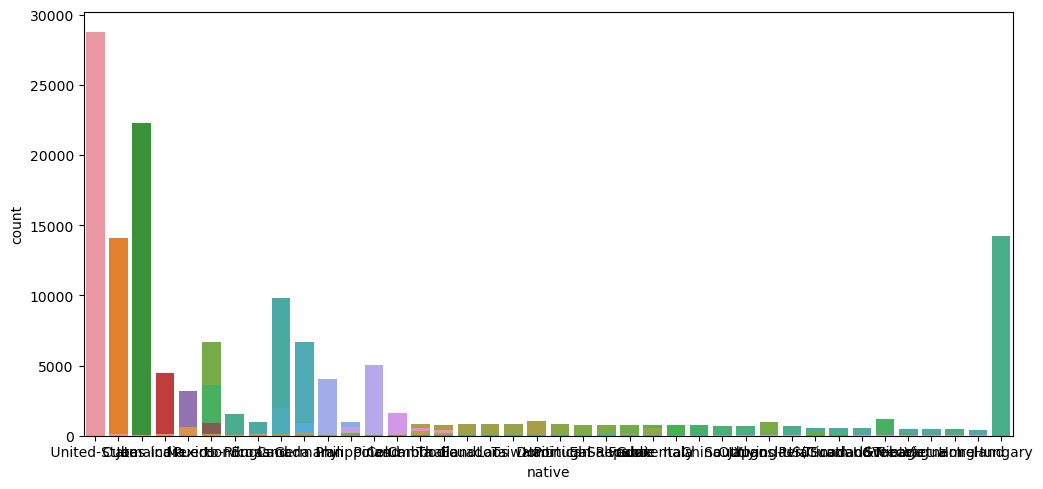

In [21]:
count_plot(SalaryData_Train,features)
plt.show()

In [22]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

encoder = OrdinalEncoder()
data_encoder = encoder.fit_transform(SalaryData_Train[features])
SalaryData_Train_encoded = pd.DataFrame(data_encoder,columns = features)

data_encoder

array([[22.,  5.,  9., ...,  0., 39., 37.],
       [33.,  4.,  9., ...,  0., 12., 37.],
       [21.,  2., 11., ...,  0., 39., 37.],
       ...,
       [41.,  2., 11., ...,  0., 39., 37.],
       [ 5.,  2., 11., ...,  0., 19., 37.],
       [35.,  3., 11., ...,  0., 39., 37.]])

In [23]:
# LabelEncoder : - Encode target labels with values betn 0 and n_classes-1.
# this transform should be used to encode the target values i.e y and not to X input variable

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(SalaryData_Train['Salary'])
SalaryData_Train_encoded['Salary'] = target_encoded
encoder.inverse_transform(target_encoded)


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [24]:
SalaryData_Train_encoded.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22.0,5.0,9.0,12.0,4.0,0.0,1.0,4.0,1.0,24.0,0.0,39.0,37.0,0
1,33.0,4.0,9.0,12.0,2.0,3.0,0.0,4.0,1.0,0.0,0.0,12.0,37.0,0
2,21.0,2.0,11.0,8.0,0.0,5.0,1.0,4.0,1.0,0.0,0.0,39.0,37.0,0
3,36.0,2.0,1.0,6.0,2.0,5.0,0.0,2.0,1.0,0.0,0.0,39.0,37.0,0
4,11.0,2.0,9.0,12.0,2.0,9.0,5.0,2.0,0.0,0.0,0.0,39.0,4.0,0


### Model Building

#### Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

X = SalaryData_Train_encoded.drop('Salary',axis=1)  # All independent var in X droping salary cols which is dependent
y = SalaryData_Train_encoded['Salary']   # dependent var in y contain only salary cols

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [26]:
# After spliting data, its shape

X_train.shape , y_train.shape

((21112, 13), (21112,))

In [27]:
# After spliting data, its shape

X_test.shape , y_test.shape

((9049, 13), (9049,))

### model Fitting

In [28]:
from sklearn import svm
from sklearn.svm import SVC

In [29]:
classifier = svm.SVC(kernel="linear")

In [30]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

### Evaluating the model

In [36]:
# With this, we can predict how accurately the model or classifier can predict

# So we will calculate the accuracy score, recall, and precision for our evaluation.

from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

# Accuracy
print("Accuracy :- ", metrics.accuracy_score(y_test, y_pred))

# precision
print("Precision :- ",metrics.precision_score(y_test, y_pred))

# recall score 
#print("Recall :-", metrics.recall_score(y_test, y_pred))

# classiffication repoort 
print(metrics.classification_report(y_test, y_pred))

Accuracy :-  0.8063874461266438
Precision :-  0.7775280898876404
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      6803
           1       0.78      0.31      0.44      2246

    accuracy                           0.81      9049
   macro avg       0.79      0.64      0.66      9049
weighted avg       0.80      0.81      0.77      9049



### Here we got 81 % Accuracy